In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/churn.csv')

In [3]:
#df.info()

In [4]:
df.sample(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1533,8519-QJGJD,Female,0,No,No,14,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,75.35,1025.95,Yes
6603,2257-BOVXD,Male,0,Yes,No,14,Yes,Yes,DSL,No,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),66.60,979.5,No
3237,6734-JDTTV,Male,0,Yes,Yes,65,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.85,1267.05,No
4505,6917-FIJHC,Female,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,26.00,1776,No
598,1710-RCXUS,Male,0,Yes,No,51,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,One year,Yes,Credit card (automatic),90.35,4614.55,No
3545,6212-ATMLK,Female,0,No,No,50,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.70,4729.75,No
4429,3486-HOOGQ,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),79.70,5743.3,No


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
def col(df):
    numerical_values = []
    categorical_values = []
    
    for i in df.columns:
        if df[i].dtype == 'object':
            categorical_values.append(i)
        else:
            numerical_values.append(i)
    
    print("Numerical Values:", ', '.join(numerical_values))
    print("\n")
    print("Categorical Values:", ', '.join(categorical_values))


In [7]:
col(df)

Numerical Values: SeniorCitizen, tenure, MonthlyCharges


Categorical Values: customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, TotalCharges, Churn


# Churn Analysis
- Churn Analysis refers to all the customers who are leaving a service.
- Churn rate, also known as customer attrition rate, refers to the percentage of customers or subscribers who discontinue using a product or service over a specific period of time.
- Churn rate is calculated by dividing the number of customers who stopped using the product or service during a given period by the total number of customers at the beginning of that period

# EDA

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

## Numerical Values

In [9]:
df.loc[df.Churn=='No','Churn'] = 0 
df.loc[df.Churn=='Yes','Churn'] = 1

### Age

In [10]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
df.groupby("gender")["Churn"].count().reset_index()

,gender,Churn
0,Female,3488
1,Male,3555


In [12]:
df.groupby("gender")["Churn"].mean().reset_index()

,gender,Churn
0,Female,0.269209
1,Male,0.261603


this means that, average churn is slightly higher in females

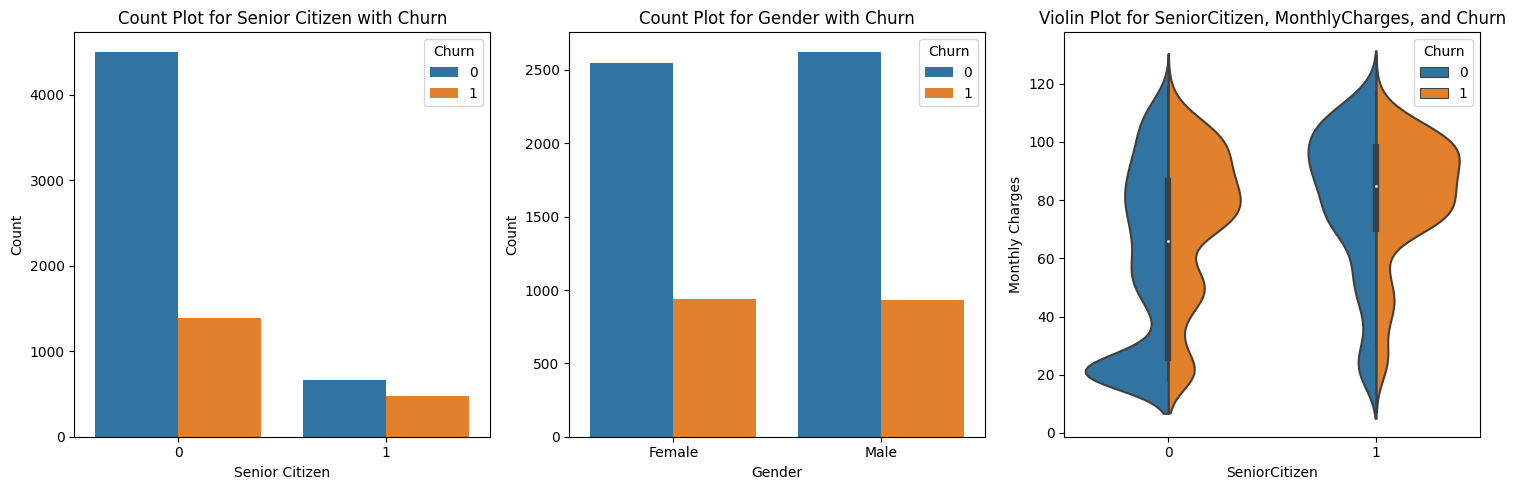

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Count plot for SeniorCitizen with churn information
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axes[0])
axes[0].set(xlabel='Senior Citizen', ylabel='Count', title='Count Plot for Senior Citizen with Churn')

# Count plot for gender with churn information
sns.countplot(data=df, x='gender', hue='Churn', ax=axes[1])
axes[1].set(xlabel='Gender', ylabel='Count', title='Count Plot for Gender with Churn')

# Violin plot for gender, MonthlyCharges, and Churn
sns.violinplot(x='SeniorCitizen', y='MonthlyCharges', hue='Churn', data=df, split=True, ax=axes[2])
axes[2].set(xlabel='SeniorCitizen', ylabel='Monthly Charges', title='Violin Plot for SeniorCitizen, MonthlyCharges, and Churn')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


- no of non senior citizen is higher
- percentage of churning customers is higher in non senior citizen
- The distributions of males and females exhibit a comparable balance, as do the distributions of churning customers within these gender groups.
- Non-senior citizens are most likely to have monthly charges around 20 dollars

### Tenure
Number of months the customer has stayed with the company

In [14]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Density'>

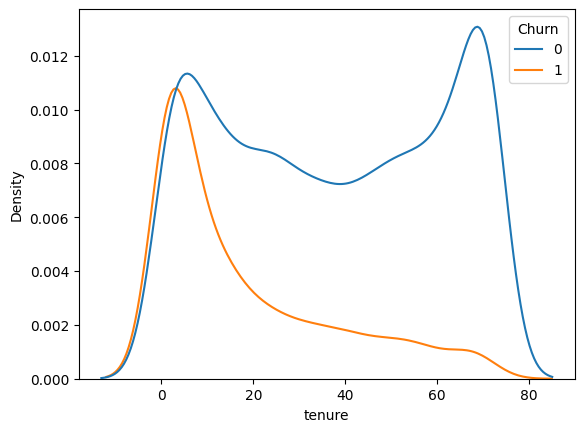

In [15]:
sns.kdeplot(data = df,
              x = 'tenure',
            hue  = 'Churn')

In [16]:
def tenure_groups(df):
    if df.tenure <= 12:
        return "less_than_1"
    elif (df.tenure > 12) & (df.tenure <= 24):
        return "less_than_2"
    elif (df.tenure > 24) & (df.tenure <= 36):
        return "less_than_3"
    elif (df.tenure > 36) & (df.tenure <= 48):
        return "less_than_4"
    elif (df.tenure > 48) & (df.tenure <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"

In [17]:
df1 = df

In [18]:
df1['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)

<AxesSubplot:xlabel='grouped_tenure', ylabel='count'>

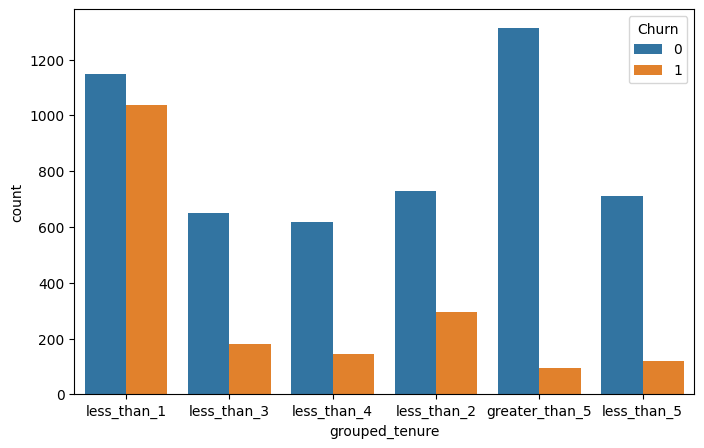

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df1,
             x = 'grouped_tenure',
             hue = 'Churn')

- we can see the density around the initial stage. so we can assume that customers who churn have a tenure of about 12 to 24 months

### MonthlyCharges
The amount charged to the customer monthly

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

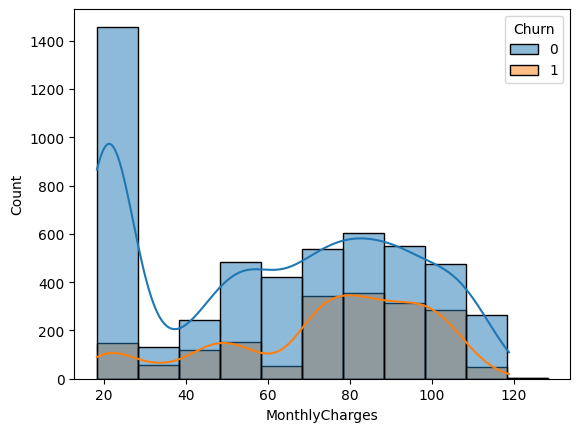

In [20]:
sns.histplot(data = df,
             x = 'MonthlyCharges',
             hue = 'Churn',
            kde = True,
            binwidth=10)

Customers starts to churn when the monthly charges go beyond 70.

## Categorical Values

### Partner_Dependents

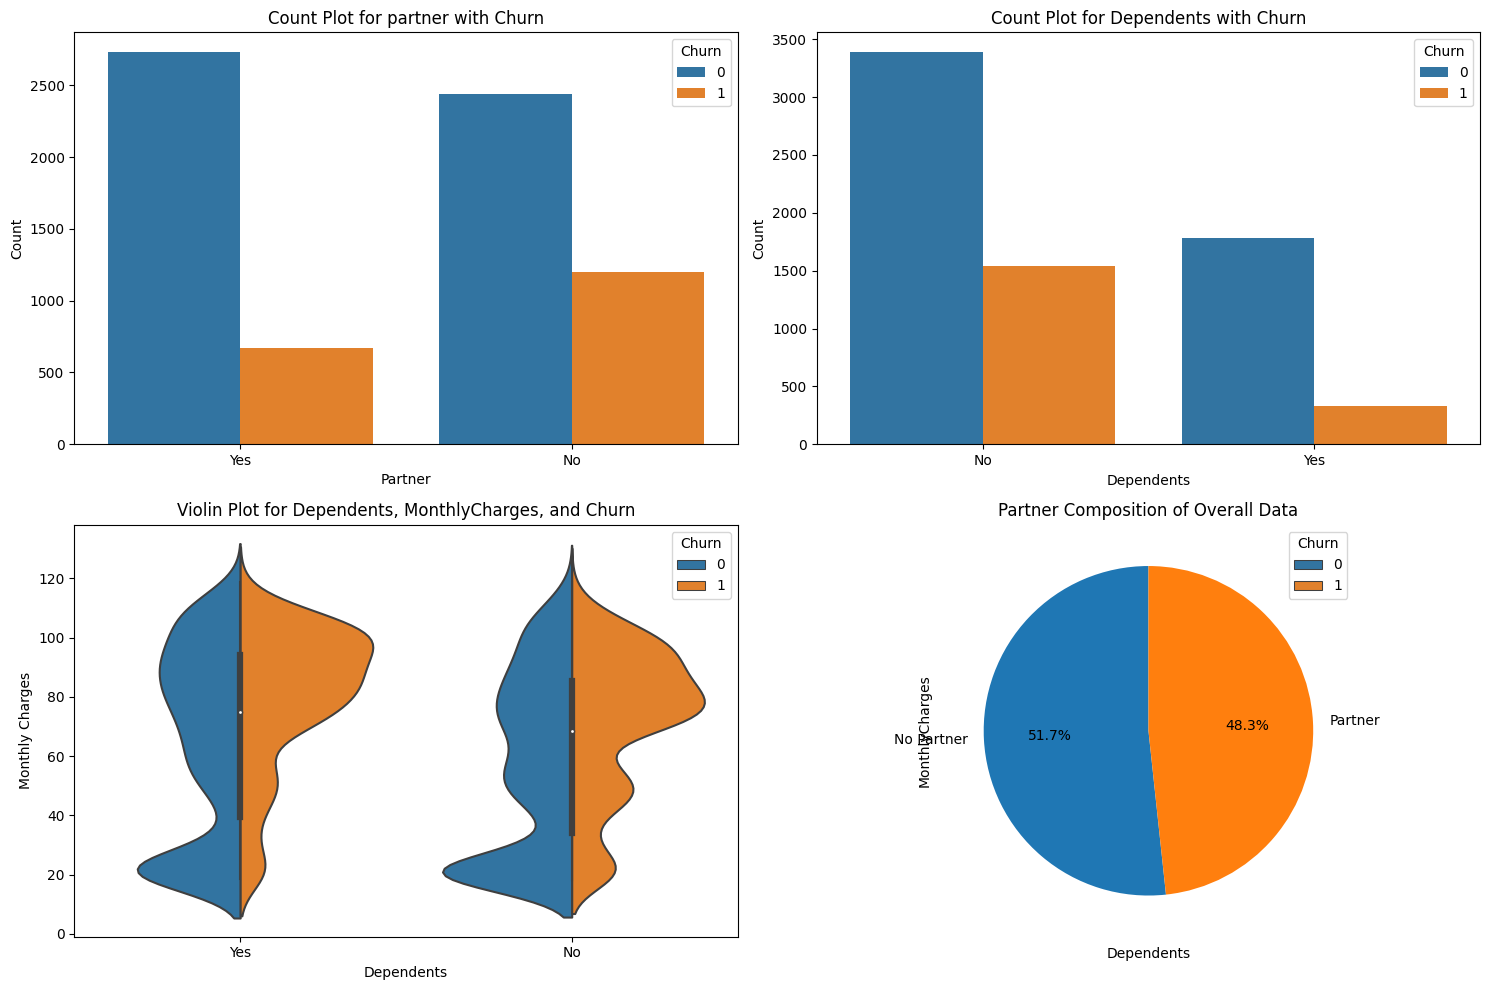

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Count plot for SeniorCitizen with churn information
sns.countplot(data=df, x='Partner', hue='Churn', ax=axes[0,0])
axes[0,0].set(xlabel='Partner', ylabel='Count', title='Count Plot for partner with Churn')

# Count plot for gender with churn information
sns.countplot(data=df, x='Dependents', hue='Churn', ax=axes[0,1])
axes[0,1].set(xlabel='Dependents', ylabel='Count', title='Count Plot for Dependents with Churn')

# Violin plot for gender, MonthlyCharges, and Churn
sns.violinplot(x='Partner', y='MonthlyCharges', hue='Churn', data=df, split=True, ax=axes[1,0])
axes[1,0].set(xlabel='Partner', ylabel='Monthly Charges', title='Violin Plot for Partner, MonthlyCharges, and Churn')

# Violin plot for Dependents, MonthlyCharges, and Churn
sns.violinplot(x='Dependents', y='MonthlyCharges', hue='Churn', data=df, split=True, ax=axes[1,1])
axes[1,0].set(xlabel='Dependents', ylabel='Monthly Charges', title='Violin Plot for Dependents, MonthlyCharges, and Churn')

plt.pie(df.Partner.value_counts(), labels = ['No Partner', 'Partner'], autopct = '%.1f%%', radius = 1, startangle = 90)
plt.title('Partner Composition of Overall Data')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

- married couples exhibit a lesser churning rate than the unmarried.

### Dependents
Whether the customer has dependents or not (Yes, No)

Text(0.5, 1.0, 'Partner Composition of Overall Data')

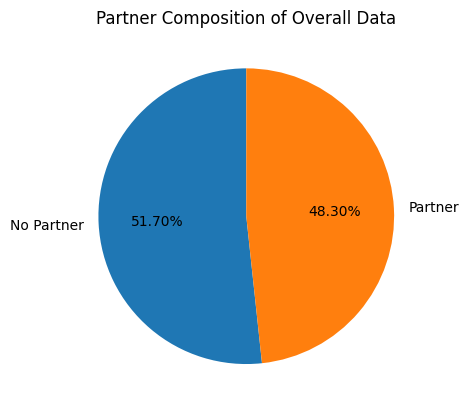

In [23]:
plt.pie(df.Partner.value_counts(), labels = ['No Partner', 'Partner'], autopct = '%.2f%%', radius = 1, startangle = 90)
plt.title('Partner Composition of Overall Data')

Text(0.5, 1.0, 'Dependent Composition of Overall Data')

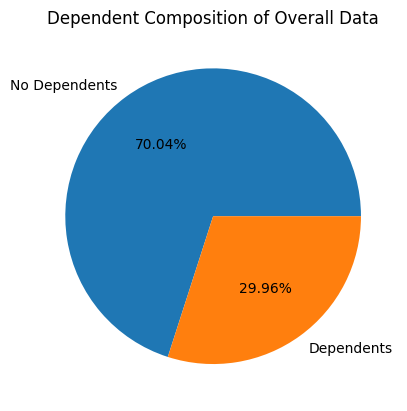

In [24]:
plt.pie(df.Dependents.value_counts(), labels = ['No Dependents', 'Dependents'], autopct = '%.2f%%', radius = 1,)
plt.title('Dependent Composition of Overall Data')

### PhoneService
Whether the customer has a phone service or not (Yes, No)

### MultipleLines
Whether the customer has multiple lines or not (Yes, No, No phone service)


since MultipleLines has included a subset of phone service lets ignore phone service

In [25]:
col(df)

Numerical Values: SeniorCitizen, tenure, MonthlyCharges


Categorical Values: customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, TotalCharges, Churn, grouped_tenure


In [26]:
filtered_df = df.groupby("InternetService")['Churn']

In [27]:
filtered_df.mean().reset_index()

,InternetService,Churn
0,DSL,0.189591
1,Fiber optic,0.418928
2,No,0.074050


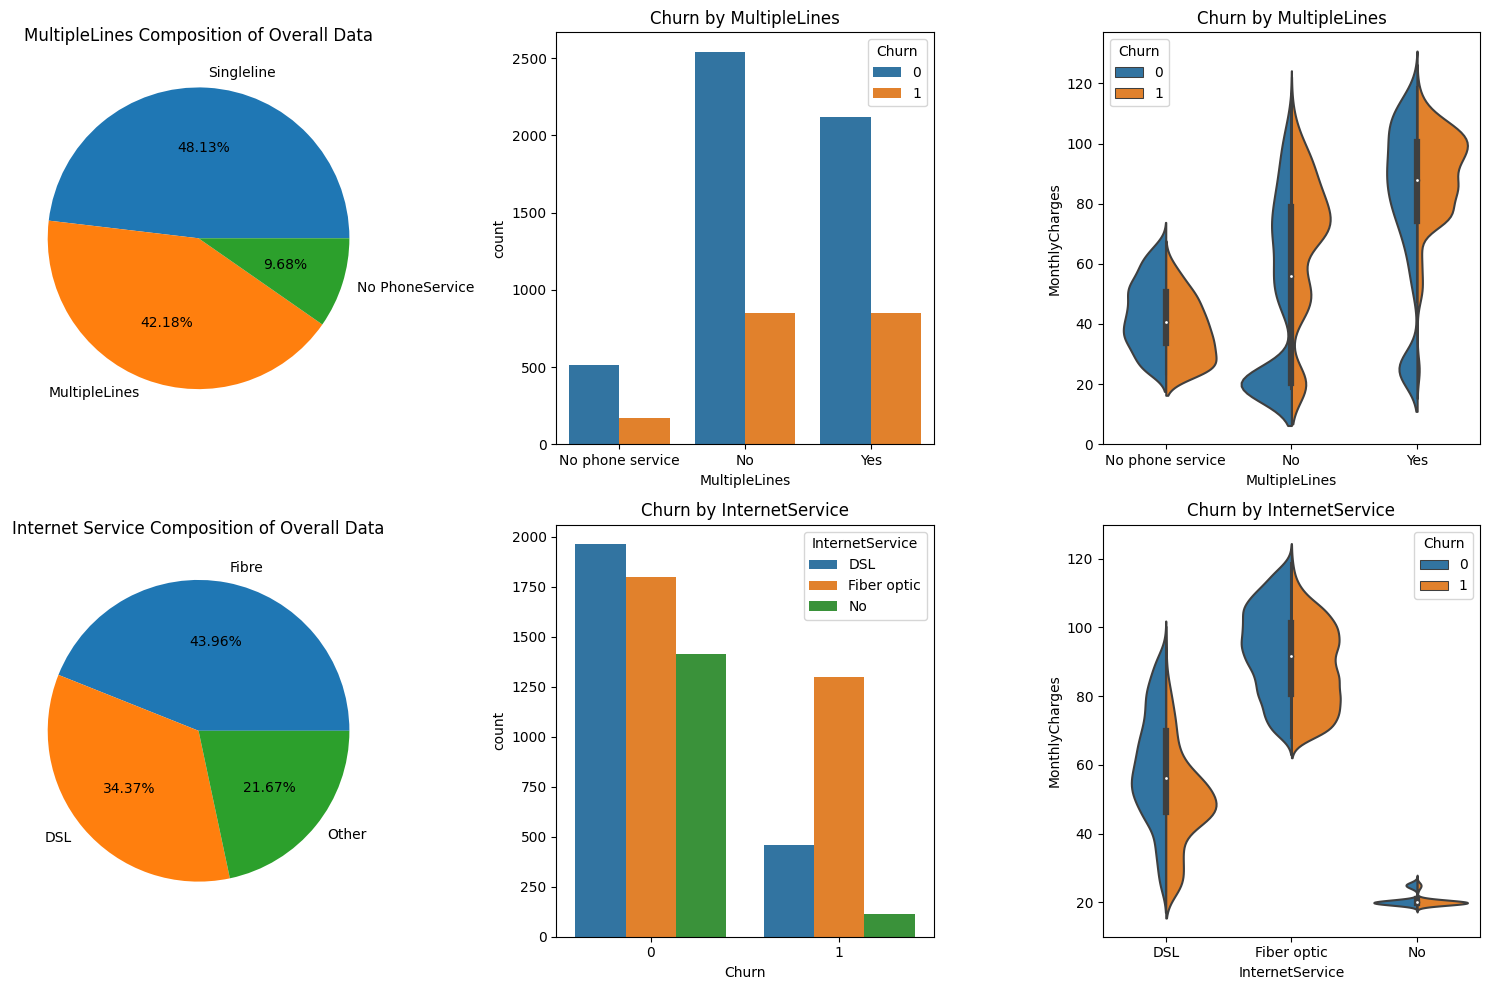

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the pie chart in the first subplot
axs[0,0].pie(df.MultipleLines.value_counts(), labels=['Singleline', 'MultipleLines', 'No PhoneService' ], autopct='%.2f%%', radius=1)
axs[0,0].set_title('MultipleLines Composition of Overall Data')

# Plot the countplot in the second subplot
sns.countplot(data=df, x='MultipleLines', hue='Churn', ax=axs[0,1])
axs[0,1].set_title('Churn by MultipleLines')

# Plot the violinplot in the third subplot
sns.violinplot(data=df, x='MultipleLines', y='MonthlyCharges', split=True, hue="Churn", ax=axs[0,2])
axs[0,2].set_title('Churn by MultipleLines')

# Plot the pie chart in the fourth subplot
axs[1,0].pie(df.InternetService.value_counts(), labels=['Fibre', 'DSL', 'Other'], autopct='%.2f%%', radius=1)
axs[1,0].set_title('Internet Service Composition of Overall Data')

# Plot the countplot in the fifth subplot
sns.countplot(data=df, x='Churn', hue='InternetService', ax=axs[1,1])
axs[1,1].set_title('Churn by InternetService')

# Plot the violinplot in the third subplot
sns.violinplot(data=df, x='InternetService', y='MonthlyCharges', split=True, hue="Churn", ax=axs[1,2])
axs[1,2].set_title('Churn by InternetService')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# And there are other features in the dataset which i Have to explore, since there is a time constraint im gonna ignore it for now

# Model Building

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

## feature engineering

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,grouped_tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,less_than_1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,less_than_3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,less_than_1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,less_than_4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,less_than_1


In [31]:
#removing unwanted columns
df1 = df[df.columns[2:]]

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [33]:
#Converting Target variable from cat to num
df1.Churn.replace({"Yes":1, "No":0}, inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8412\2265986304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Churn.replace({"Yes":1, "No":0}, inplace = True)


In [34]:
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,grouped_tenure
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,less_than_1
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,less_than_3
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,less_than_1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,less_than_4
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,less_than_1


In [35]:
categorical_vars = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [36]:
df2 = df1.drop(df1[categorical_vars], axis = 1)

In [37]:
dummy_df = pd.get_dummies(df1[categorical_vars])

In [38]:
dummy_df.head()

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [39]:
# Concatenate the original DataFrame with the dummy variables
dummy_df2 = pd.concat([df2, dummy_df], axis=1)

In [40]:
dummy_df2.isna().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
grouped_tenure                             0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBack

In [52]:
dummy_df2["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')


In [53]:
from sklearn.impute import SimpleImputer

# Create an imputer for numerical columns (e.g., 'tenure' and 'MonthlyCharges')
num_imputer = SimpleImputer(strategy='mean')

# Impute missing values for numerical columns
dummy_df2['TotalCharges'] = num_imputer.fit_transform(dummy_df2[['TotalCharges']])

In [54]:
dummy_df2.Churn.head(2)

0    0
1    0
Name: Churn, dtype: int64

In [55]:
dummy_df2 = dummy_df2.replace(' ', np.nan)

<AxesSubplot:>

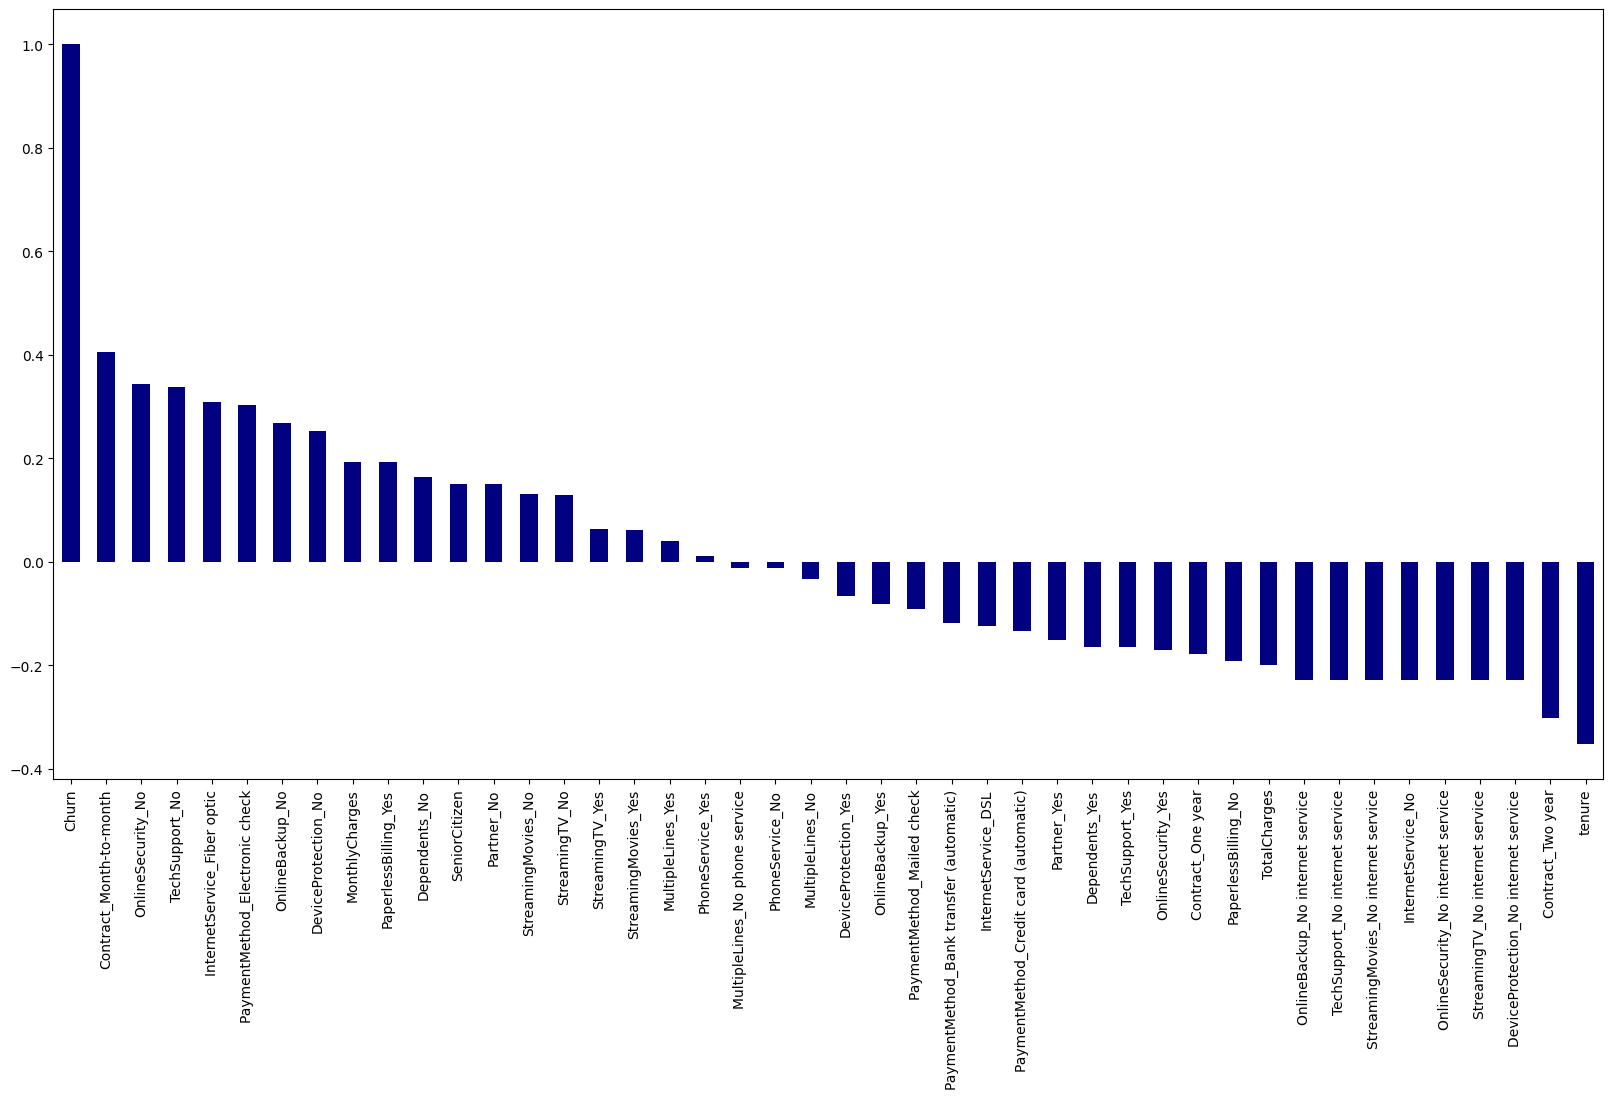

In [56]:
#Plot correlations between our features and our target feature, churn, as a bar plot, sort by descending order
dummy_df2.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20, 10), color='navy')

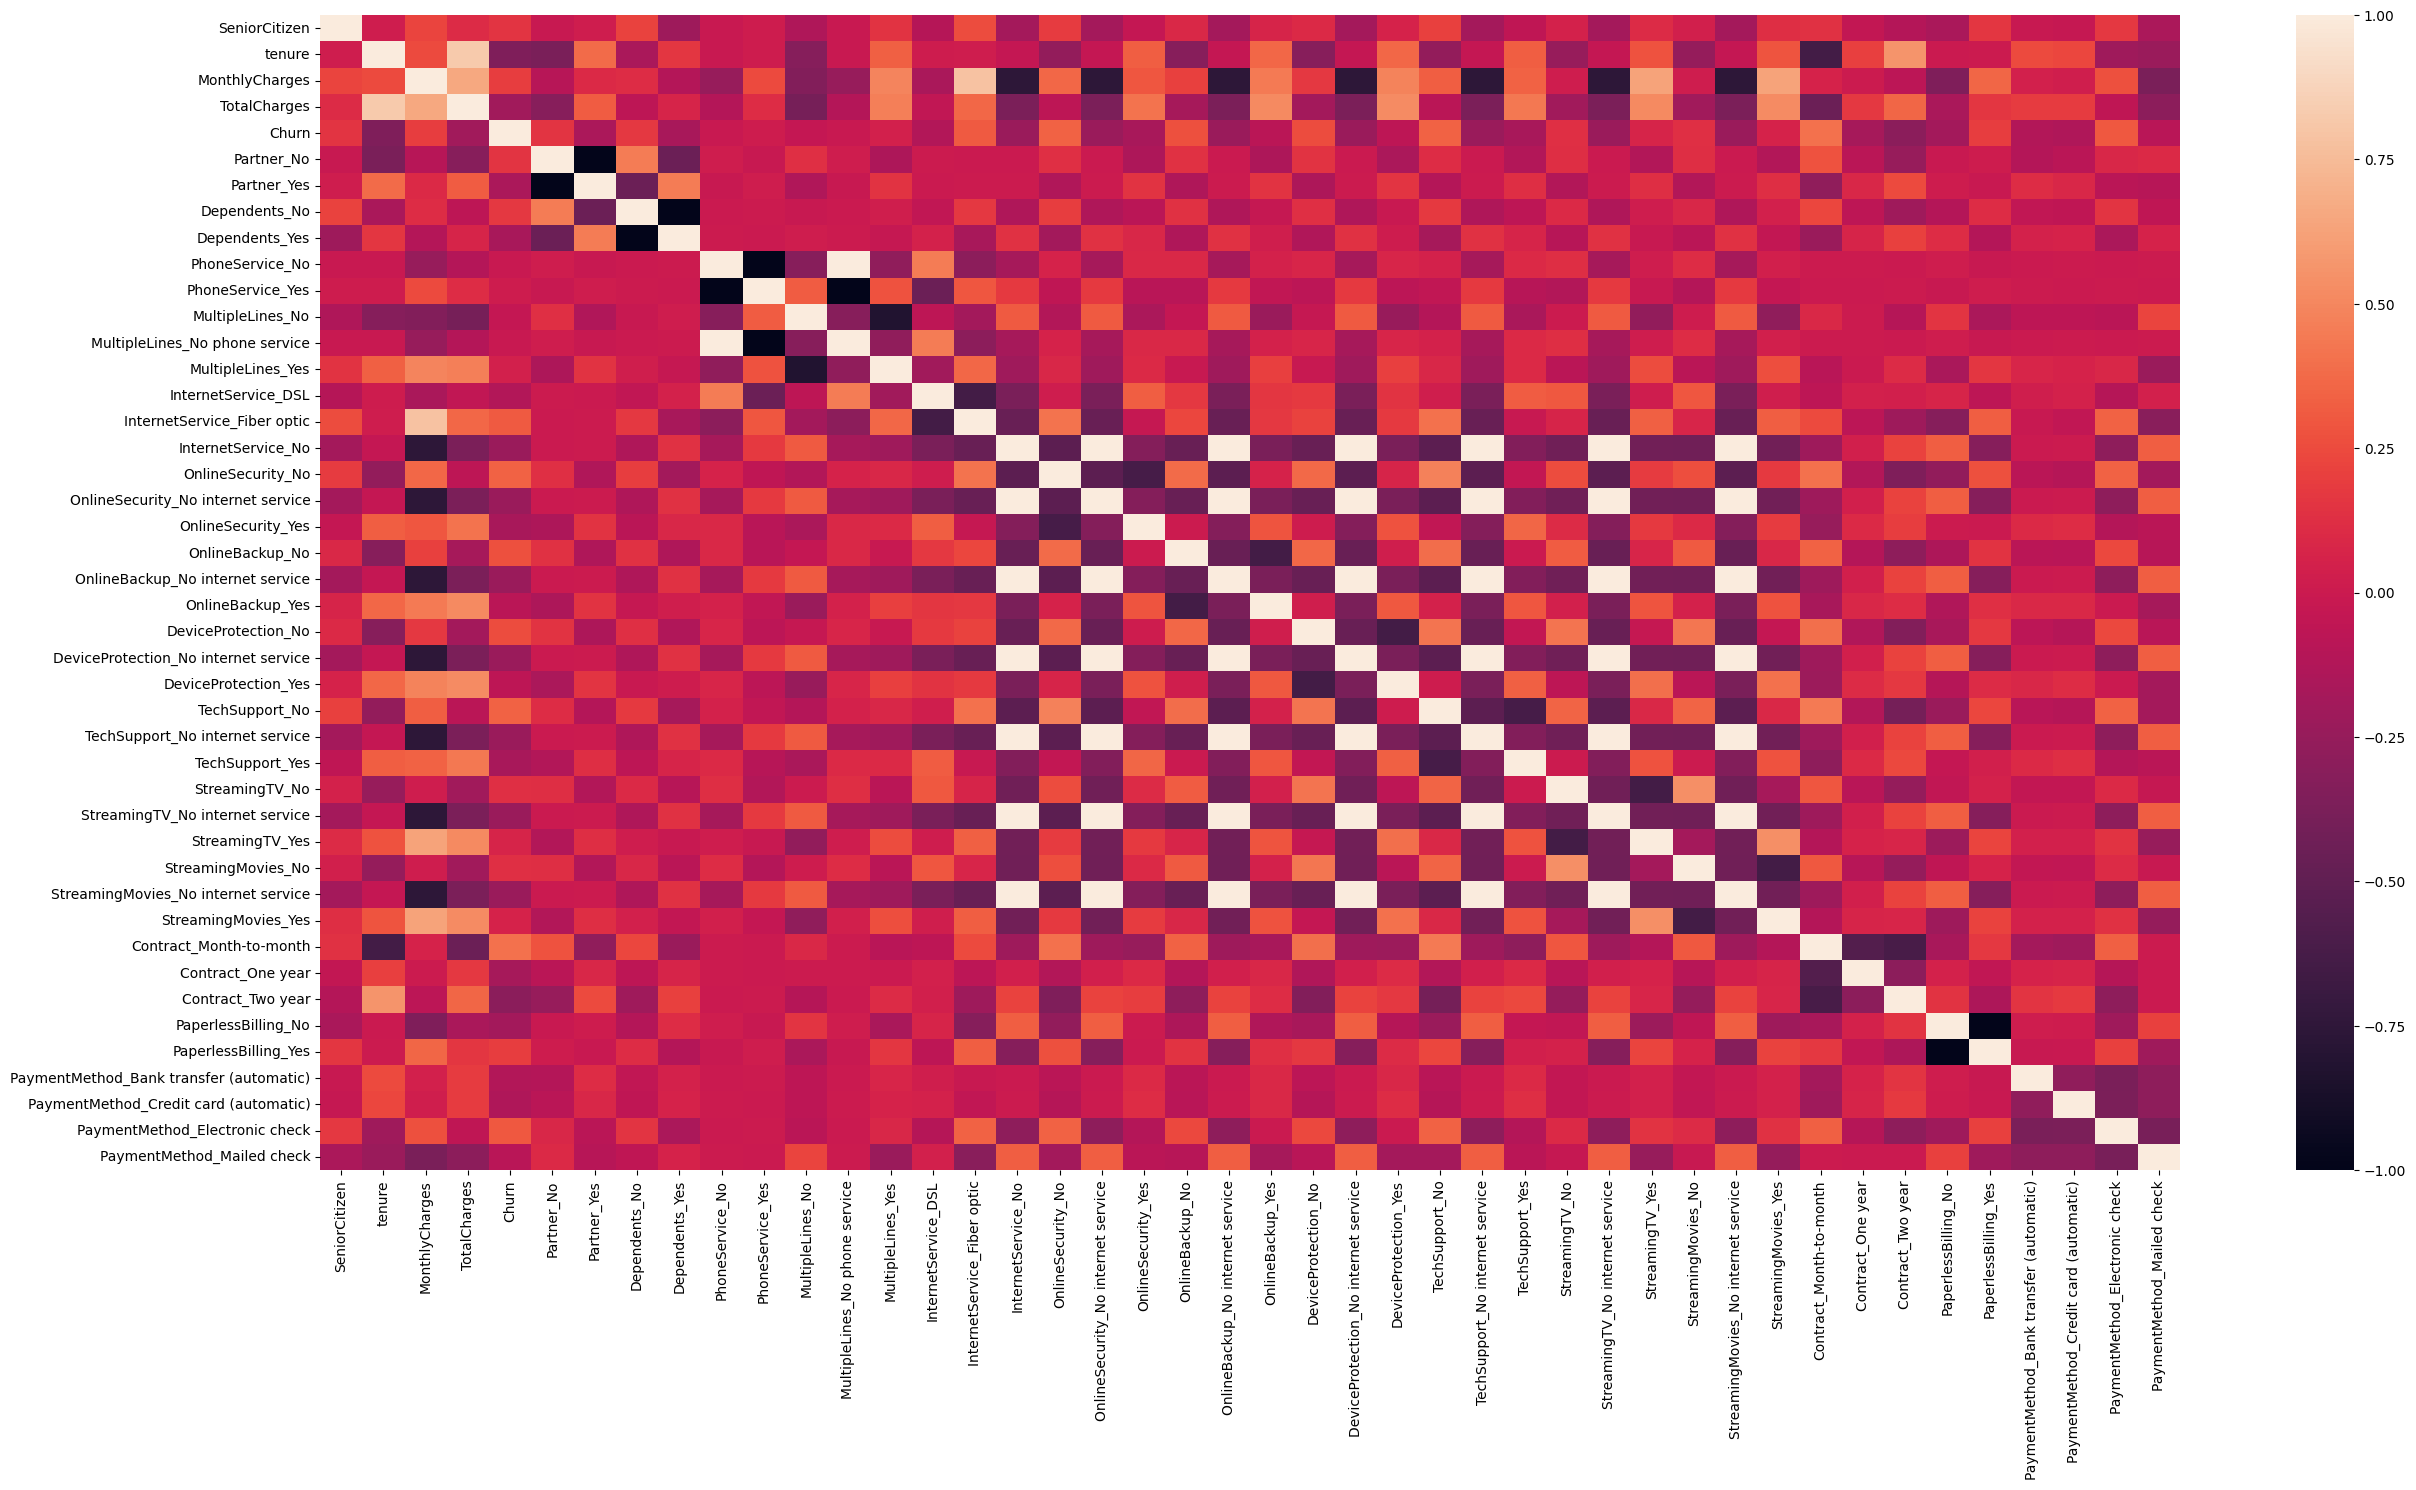

In [57]:
# Visualize a heatmap for our features correlation values
plt.figure(figsize = (30, 15))
x = sns.heatmap(dummy_df2.corr())

## Splitting the data

In [76]:
x,y = dummy_df2.drop(["Churn","grouped_tenure"], axis = 1), dummy_df2["Churn"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# Logistic Regression

In [86]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [87]:
from sklearn.preprocessing import StandardScaler

In [79]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [80]:
# Scale the numerical features
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [85]:
# Create and fit the logistic regression model using the scaled data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [88]:
y_pred = logreg.predict(x_test)

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [90]:
accuracy_score(y_test, y_pred)

0.8197303051809794

# Accuracy is 81%

[[931 105]
 [149 224]]


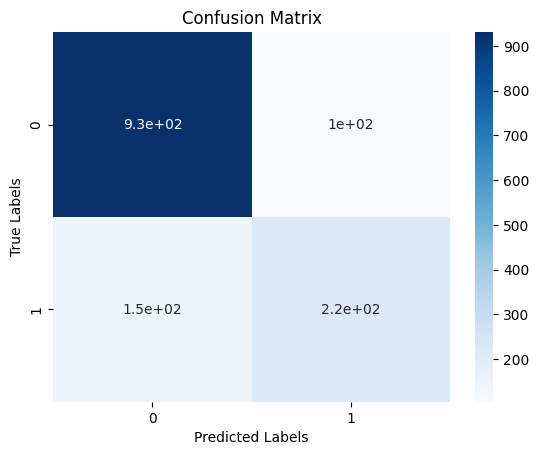

In [91]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



# Tuning

# Feature Engineering

In [97]:
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [98]:
df_data = pd.read_csv("Data\Churn.csv")

In [99]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
df_data.loc[df_data.Churn=='No','Churn'] = 0 
df_data.loc[df_data.Churn=='Yes','Churn'] = 1

In [101]:
df_data["Churn"] = pd.to_numeric(df_data["Churn"])

In [102]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [103]:
df_data.tenure.describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [104]:
df_plot = df_data.groupby('tenure').Churn.mean().reset_index()

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt


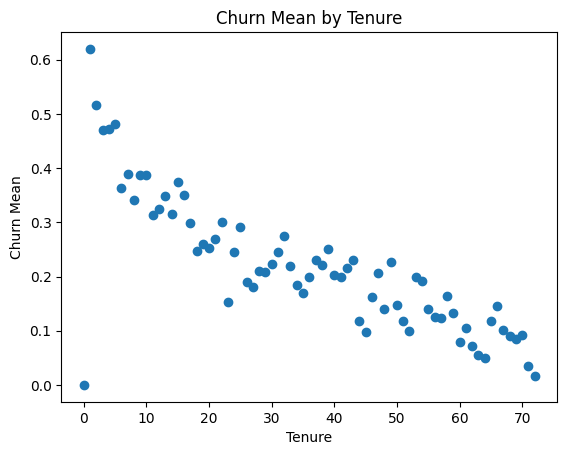

In [106]:
# Extract the data from the DataFrame
x = df_plot['tenure']
y = df_plot['Churn']

# Create the scatter plot
plt.scatter(x, y)

# Set the labels and title
plt.xlabel('Tenure')
plt.ylabel('Churn Mean')
plt.title('Churn Mean by Tenure')

# Display the plot
plt.show()

In [107]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [108]:
from sklearn.cluster import KMeans

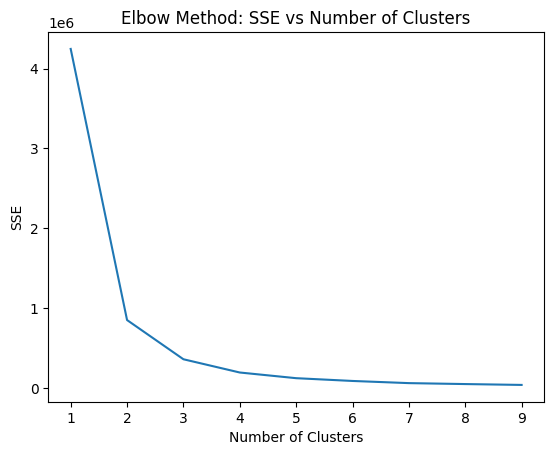

In [109]:
sse = {}
df_cluster = df_data[['tenure']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(df_cluster)
    df_cluster = df_cluster.assign(clusters=kmeans.labels_)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method: SSE vs Number of Clusters")
plt.show()


In [110]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(df_data[['tenure']])
df_data['TenureCluster'] = kmeans.predict(df_data[['tenure']])

In [111]:
df_data = order_cluster('TenureCluster', 'tenure',df_data,True)


In [112]:
df_data.groupby('TenureCluster').tenure.describe()


,count,mean,std,min,25%,50%,75%,max
TenureCluster,,,,,,,,
0,2878.0,7.512509,5.977337,0.0,2.0,6.0,12.0,20.0
1,1926.0,33.854102,8.208706,21.0,26.0,34.0,41.0,48.0
2,2239.0,63.048682,7.478229,49.0,56.0,64.0,70.0,72.0


In [113]:
df_data['TenureCluster'] = df_data["TenureCluster"].replace({0:'Low',1:'Mid',2:'High'})


In [114]:
df_plot = df_data.groupby('TenureCluster').Churn.mean().reset_index()


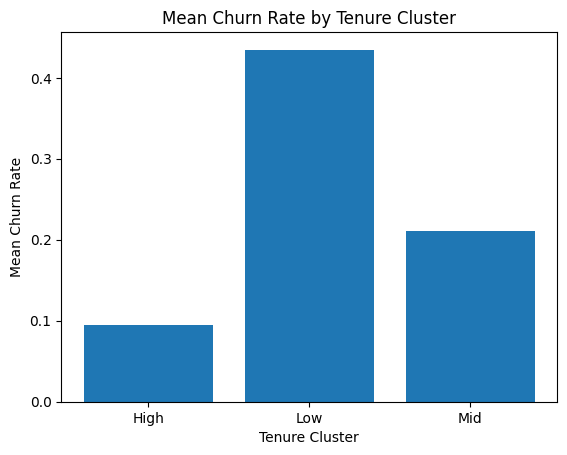

In [115]:
# Extract the data from the DataFrame
x = df_plot['TenureCluster']
y = df_plot['Churn']

# Create the bar plot
plt.bar(x, y)

# Set the labels and title
plt.xlabel('Tenure Cluster')
plt.ylabel('Mean Churn Rate')
plt.title('Mean Churn Rate by Tenure Cluster')

# Display the plot
plt.show()


In [116]:
df_plot = df_data.copy()
df_plot['MonthlyCharges'] = df_plot['MonthlyCharges'].astype(int)
df_plot = df_plot.groupby('MonthlyCharges').Churn.mean().reset_index()

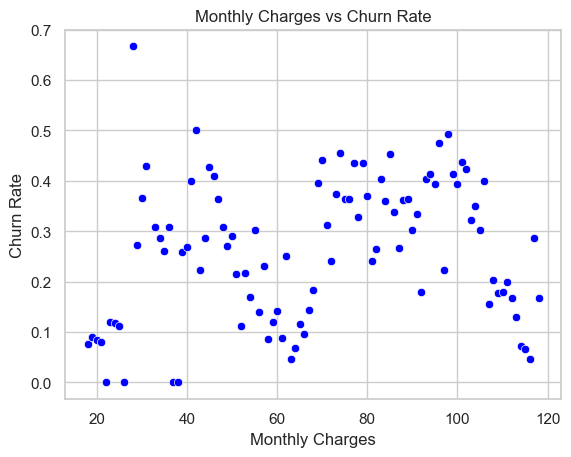

In [117]:
# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot using seaborn
sns.scatterplot(data=df_plot, x='MonthlyCharges', y='Churn', color='blue')

# Set the labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate')
plt.title('Monthly Charges vs Churn Rate')

# Display the plot
plt.show()


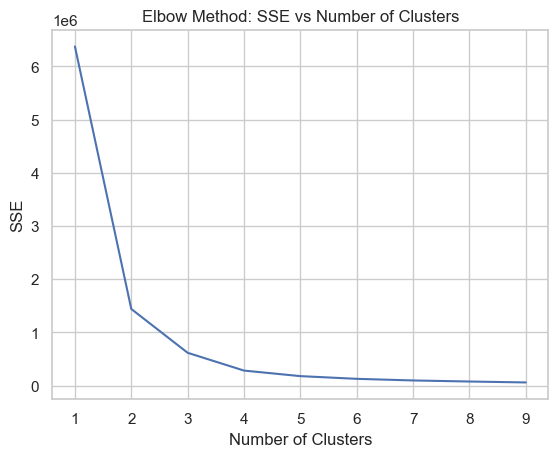

In [118]:
sse = {}
df_cluster = df_data[['MonthlyCharges']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(df_cluster)
    df_cluster = df_cluster.assign(clusters=kmeans.labels_)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method: SSE vs Number of Clusters")
plt.show()

In [119]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(df_data[['MonthlyCharges']])
df_data['MonthlyChargeCluster'] = kmeans.predict(df_data[['MonthlyCharges']])

In [120]:
df_data = order_cluster('MonthlyChargeCluster', 'MonthlyCharges',df_data,True)


In [121]:
df_data.groupby('MonthlyChargeCluster').MonthlyCharges.describe()


,count,mean,std,min,25%,50%,75%,max
MonthlyChargeCluster,,,,,,,,
0,1892.0,23.384619,5.660437,18.25,19.80,20.40,25.0500,42.40
1,2239.0,61.628808,10.441432,42.60,51.80,61.55,70.7000,77.80
2,2912.0,94.054258,10.343944,77.85,85.05,93.90,101.9125,118.75


In [122]:
df_data['MonthlyChargeCluster'] = df_data["MonthlyChargeCluster"].replace({0:'Low',1:'Mid',2:'High'})


In [123]:
df_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureCluster,MonthlyChargeCluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Low,Low
1,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,Month-to-month,No,Mailed check,29.75,301.9,0,Low,Low
2,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,0,Low,Low
3,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1,Low,Low
4,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,0,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Electronic check,104.95,7544.3,0,High,High
7039,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,0,High,High
7040,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1,High,High
7041,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,High,High


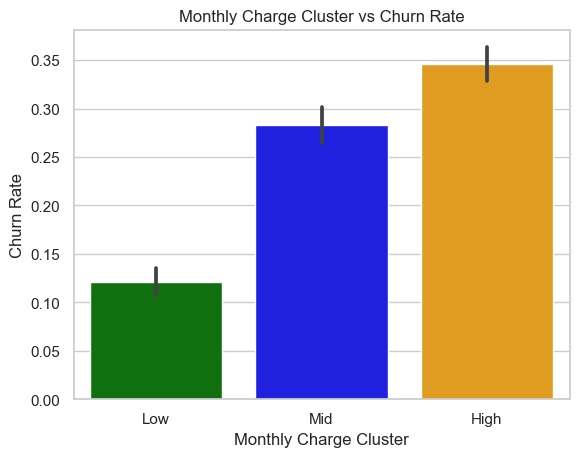

In [124]:
# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot using seaborn
sns.barplot(data=df_data, x='MonthlyChargeCluster', y='Churn', palette=['green', 'blue', 'orange'])

# Set the labels and title
plt.xlabel('Monthly Charge Cluster')
plt.ylabel('Churn Rate')
plt.title('Monthly Charge Cluster vs Churn Rate')

# Display the plot
plt.show()

In [125]:
df_data[pd.to_numeric(df_data['TotalCharges'], errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureCluster,MonthlyChargeCluster
91,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,0,Low,Low
136,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,0,Low,Low
416,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,Low,Low
478,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,Low,Low
556,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,0,Low,Low
668,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,Low,Low
1976,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,Low,Mid
2114,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,Low,Mid
2995,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,,0,Low,Mid
3008,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0,Low,Mid


In [126]:
len(df_data[pd.to_numeric(df_data['TotalCharges'], errors='coerce').isnull()])


11

In [127]:
df_data.loc[pd.to_numeric(df_data['TotalCharges'], errors='coerce').isnull(),'TotalCharges'] = np.nan


In [128]:
df_data = df_data.dropna()


In [129]:
df_data.loc[:, 'TotalCharges'] = pd.to_numeric(df_data['TotalCharges'], errors='coerce')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8412\1523020017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.loc[:, 'TotalCharges'] = pd.to_numeric(df_data['TotalCharges'], errors='coerce')


In [130]:
df_plot = df_data.copy()
df_plot['TotalCharges'] = df_plot['TotalCharges'].astype(int)
df_plot = df_plot.groupby('TotalCharges').Churn.mean().reset_index()


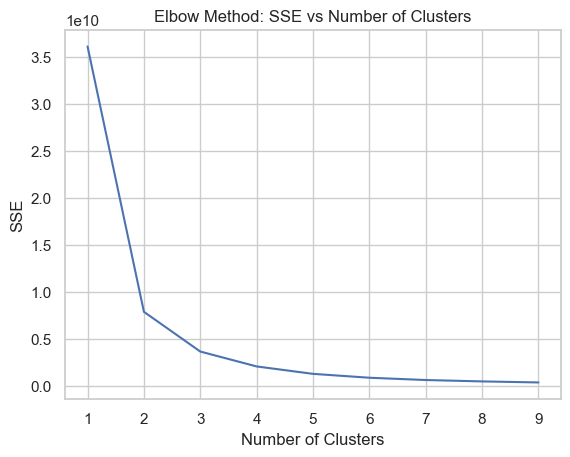

In [131]:
sse = {}
df_cluster = df_data[['TotalCharges']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(df_cluster)
    df_cluster = df_cluster.assign(clusters=kmeans.labels_)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method: SSE vs Number of Clusters")
plt.show()

In [132]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(df_data[['TotalCharges']])
df_data['TotalChargeCluster'] = kmeans.predict(df_data[['TotalCharges']])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8412\2282370152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['TotalChargeCluster'] = kmeans.predict(df_data[['TotalCharges']])


In [133]:
df_data = order_cluster('TotalChargeCluster', 'TotalCharges',df_data,True)


In [134]:
df_data.groupby('TotalChargeCluster').TotalCharges.describe()


,count,mean,std,min,25%,50%,75%,max
TotalChargeCluster,,,,,,,,
0,4187.0,694.648185,579.734247,18.80,162.5000,543.80,1155.850,2011.40
1,1609.0,3315.953543,817.842314,2012.70,2586.0000,3254.35,4016.750,4824.45
2,1236.0,6320.637136,991.754161,4828.05,5510.3125,6174.30,7055.425,8684.80


In [135]:
df_data['TotalChargeCluster'] = df_data["TotalChargeCluster"].replace({0:'Low',1:'Mid',2:'High'})


In [136]:
df_plot = df_data.groupby('TotalChargeCluster').Churn.mean().reset_index()

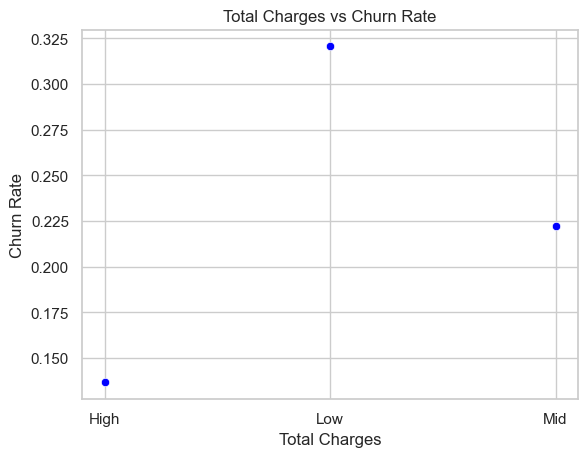

In [137]:
# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot using seaborn
sns.scatterplot(data=df_plot, x='TotalChargeCluster', y='Churn', color='blue')

# Set the labels and title
plt.xlabel('Total Charges')
plt.ylabel('Churn Rate')
plt.title('Total Charges vs Churn Rate')

# Display the plot
plt.show()

In [138]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in df_data.columns:
    if df_data[column].dtype == object and column != 'customerID':
        if df_data[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df_data[column] = le.fit_transform(df_data[column]) 
        else:
            dummy_columns.append(column)

#apply get dummies for selected columns
df_data = pd.get_dummies(data = df_data,columns = dummy_columns) 

In [139]:
df_data[['gender','Partner','TenureCluster_High','TenureCluster_Low','TenureCluster_Mid']].head()


,gender,Partner,TenureCluster_High,TenureCluster_Low,TenureCluster_Mid
0,0,1,0,1,0
1,0,0,0,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,1,1,0,1,0


In [140]:
all_columns = []
for column in df_data.columns:
    column = column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_")
    all_columns.append(column)

df_data.columns = all_columns

In [141]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,PaymentMethod_Mailed_check,TenureCluster_High,TenureCluster_Low,TenureCluster_Mid,MonthlyChargeCluster_High,MonthlyChargeCluster_Low,MonthlyChargeCluster_Mid,TotalChargeCluster_High,TotalChargeCluster_Low,TotalChargeCluster_Mid
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,1,0,0,1,0,0,1,0
1,6713-OKOMC,0,0,0,0,10,0,0,29.75,301.90,...,1,0,1,0,0,1,0,0,1,0
2,7469-LKBCI,1,0,0,0,16,1,0,18.95,326.80,...,0,0,1,0,0,1,0,0,1,0
3,8779-QRDMV,1,1,0,0,1,0,1,39.65,39.65,...,0,0,1,0,0,1,0,0,1,0
4,1680-VDCWW,1,0,1,0,12,1,0,19.80,202.25,...,0,0,1,0,0,1,0,0,1,0


In [142]:
glm_columns = 'gender'

for column in df_data.columns:
    if column not in ['Churn','customerID','gender']:
        glm_columns = glm_columns + ' + ' + column

In [143]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
 

glm_model = smf.glm(formula='Churn ~ {}'.format(glm_columns), data=df_data, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                            GLM   Df Residuals:                     7002
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2900.2
Date:                Mon, 15 May 2023   Deviance:                       5800.3
Time:                        16:37:53   Pearson chi2:                 7.58e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2834
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [144]:
np.exp(res.params)


Intercept                                  1.272257
gender                                     0.973295
SeniorCitizen                              1.250145
Partner                                    1.002331
Dependents                                 0.873651
tenure                                     0.937748
PhoneService                               1.246672
PaperlessBilling                           1.416465
MonthlyCharges                             0.966952
TotalCharges                               1.000148
MultipleLines_No                           0.889550
MultipleLines_No_phone_service             1.020522
MultipleLines_Yes                          1.401463
InternetService_DSL                        0.550018
InternetService_Fiber_optic                2.816765
InternetService_No                         0.821196
OnlineSecurity_No                          1.380590
OnlineSecurity_No_internet_service         0.821196
OnlineSecurity_Yes                         1.122182
OnlineBackup

In [145]:
#create feature set and labels
X = df_data.drop(['Churn','customerID'],axis=1)
y = df_data.Churn

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [153]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score

In [154]:
#building the model
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.84
Accuracy of XGB classifier on test set: 0.82


In [155]:
y_pred = xgb_model.predict(X_test)


In [156]:
from sklearn.metrics import classification_report

In [157]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       254
           1       0.72      0.58      0.64        98

    accuracy                           0.82       352
   macro avg       0.79      0.75      0.76       352
weighted avg       0.81      0.82      0.81       352



In [158]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [159]:
from xgboost import plot_importance

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

In [ ]:
# Convert the DataFrame to DMatrix
dtest = xgb.DMatrix(df_data[X_train.columns])

# Make predictions
predictions = xgb_model.predict(dtest)

# Assign the predicted probabilities to the 'proba' column in df_data
df_data['proba'] = predictions

In [ ]:
df_data[["proba", "customerID"]].sample(15)

In [160]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy_score(y_test, y_pred)

0.8210227272727273

# 82%